In [105]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
import sklearn
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
language = 'fsl'

In [107]:
datasets = {chr(letter):pd.read_csv(f'processed_data/{language}_mp01021/{chr(letter)}_Data.csv') for letter in range(ord('A'), ord('Z') + 1)}

In [108]:
datasets['A'].head()

,Landmarks,0,0.1,0.2,1,1.1,1.2,2,2.1,2.2,...,17.2,18,18.1,18.2,19,19.1,19.2,20,20.1,20.2
0,Coordinates,x,y,z,x,y,z,x,y,z,...,z,x,y,z,x,y,z,x,y,z
1,Frame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,-0.328798770904541,0.9440675973892212,-0.025055259466171265,0.09019581228494644,0.9056023955345154,-0.2417997121810913,0.46820488572120667,0.5142858624458313,-0.30139783024787903,...,-0.08161065727472305,-0.49492689967155457,-0.06241708993911743,-0.1844290941953659,-0.4510268270969391,0.20504318177700043,-0.10821167379617691,-0.46734902262687683,0.2073359340429306,-0.024087782949209213
3,2,-0.2267197072505951,0.9729245901107788,-0.044898826628923416,0.20533159375190735,0.8290771842002869,-0.22340598702430725,0.5266153812408447,0.4613969922065735,-0.29489830136299133,...,-0.09364113956689835,-0.4352213144302368,-0.06646435707807541,-0.1759088933467865,-0.39210861921310425,0.18160800635814667,-0.09695502370595932,-0.4101670980453491,0.21136802434921265,-0.012231195345520973
4,3,-0.29781967401504517,0.9545851945877075,-0.008398245088756084,0.12096328288316727,0.8573551177978516,-0.1993054896593094,0.4726623594760895,0.46044933795928955,-0.22897109389305115,...,-0.008828305639326572,-0.4492706060409546,-0.06148320436477661,-0.11127342283725739,-0.42576828598976135,0.19160698354244232,-0.04531983286142349,-0.4427775740623474,0.2054169476032257,0.03030148148536682


In [109]:
for key, value in datasets.items():
    datasets[key] = datasets[key].drop([0,1])
    datasets[key] = datasets[key].drop(columns=['Landmarks'])
    datasets[key]['Letter'] = key
    datasets[key] = datasets[key].sample(frac=1).reset_index(drop=True)

In [110]:
datasets['B'].head()

,0,0.1,0.2,1,1.1,1.2,2,2.1,2.2,3,...,18,18.1,18.2,19,19.1,19.2,20,20.1,20.2,Letter
0,-0.11249200254678726,0.9912635684013367,0.06886274367570877,0.14595633745193481,0.7679682374000549,-0.03330807387828827,0.25723111629486084,0.4412213861942291,-0.08767446130514145,0.10985442996025085,...,-0.3732387125492096,-0.11836029589176178,-0.16197946667671204,-0.3689967691898346,-0.3103388845920563,-0.18783676624298096,-0.35596778988838196,-0.4762900173664093,-0.21217714250087738,B
1,-0.2510085701942444,0.9647804498672485,0.07869814336299896,0.09370530396699905,0.8470234274864197,-0.031311582773923874,0.3445169925689697,0.5443705320358276,-0.07558351010084152,0.3130711615085602,...,-0.37790316343307495,-0.20599040389060974,-0.16206185519695282,-0.3638664186000824,-0.4049097001552582,-0.18332558870315552,-0.3470643162727356,-0.5822650790214539,-0.20661847293376923,B
2,0.18422526121139526,0.9820296764373779,-0.040972109884023666,0.36633482575416565,0.674165666103363,-0.0732947364449501,0.34758445620536804,0.3340713381767273,-0.08007883280515671,0.17948739230632782,...,-0.3636789321899414,-0.06022780388593674,-0.16889247298240662,-0.40500566363334656,-0.2380131334066391,-0.1717091053724289,-0.4299772083759308,-0.3970986604690552,-0.1797344833612442,B
3,0.09132646024227142,0.9957253336906433,0.013804902322590351,0.2823439836502075,0.7157824039459229,-0.08557950705289841,0.30271798372268677,0.35298508405685425,-0.13630394637584686,0.16947053372859955,...,-0.3462786078453064,-0.07725509256124496,-0.11136477440595627,-0.3624652624130249,-0.26370981335639954,-0.12092801928520203,-0.359837144613266,-0.42274010181427,-0.14136138558387756,B
4,-0.15176652371883392,0.9860975742340088,0.06766480952501297,0.1269291490316391,0.7756169438362122,-0.020349841564893723,0.2519721984863281,0.4486621916294098,-0.06971723586320877,0.15961146354675293,...,-0.36229407787323,-0.13591435551643372,-0.18061751127243042,-0.3516286015510559,-0.3324553668498993,-0.20805829763412476,-0.33544787764549255,-0.498026043176651,-0.23398476839065552,B


In [111]:
data = pd.concat(datasets.values(), ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,0,0.1,0.2,1,1.1,1.2,2,2.1,2.2,3,...,18,18.1,18.2,19,19.1,19.2,20,20.1,20.2,Letter
0,0.1302979290485382,0.9865435361862183,-0.09876357018947601,0.4070073068141937,0.6436319947242737,-0.02433900162577629,0.5827159881591797,0.3233124017715454,-0.05085596814751625,0.804610550403595,...,0.005806113593280315,-0.2689250409603119,-0.32753461599349976,0.13709129393100739,-0.4606003165245056,-0.3372702896595001,0.2828095257282257,-0.5998898148536682,-0.34630125761032104,C
1,-0.20256845653057098,0.979263424873352,0.0030351390596479177,0.19855694472789764,0.7789934277534485,-0.1368437558412552,0.3930110037326813,0.37129876017570496,-0.19591093063354492,0.25316479802131653,...,-0.20076468586921692,0.1945134997367859,-0.22961336374282837,-0.16432681679725647,0.450108140707016,-0.1638793647289276,-0.22623932361602783,0.4666516184806824,-0.07500095665454865,N
2,-0.444639652967453,0.8951502442359924,0.03164789080619812,-0.05876961350440979,0.9200785160064697,-0.09342203289270401,0.30101823806762695,0.6943231225013733,-0.16609075665473938,0.4696109890937805,...,-0.38177672028541565,-0.3322431445121765,-0.22039860486984253,-0.3247595727443695,-0.3136829435825348,-0.24956804513931274,-0.3406381905078888,-0.16782239079475403,-0.25037458539009094,E
3,-0.23103736340999603,0.9729325771331787,0.0048903813585639,0.11734297126531601,0.8587636947631836,-0.13050684332847595,0.4128900170326233,0.5784908533096313,-0.1794598400592804,0.7055270671844482,...,-0.43762093782424927,-0.17953048646450043,-0.15861116349697113,-0.40477076172828674,-0.043471936136484146,-0.12520189583301544,-0.3835669159889221,0.0888572484254837,-0.06969045102596283,L
4,-0.1468822956085205,0.9884580373764038,0.03709800913929939,0.10018879920244217,0.771657407283783,-0.052215367555618286,0.1806398630142212,0.38716381788253784,-0.10580216348171234,0.01315179094672203,...,-0.31031519174575806,0.24092410504817963,-0.2565699517726898,-0.2066328376531601,0.44448044896125793,-0.24906671047210693,-0.17182764410972595,0.540383517742157,-0.2130708545446396,N


In [112]:
y = data['Letter']
X = data.drop(columns=['Letter'])

In [113]:
y = data['Letter']
X = data.drop(columns=['Letter'])
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.3, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.dropna()
X_train = X_train.to_numpy()
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_val = X_val.dropna()
X_val = X_val.to_numpy()
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.dropna()
X_test = X_test.to_numpy()


le = LabelEncoder()
y_train = le.fit_transform(y_train)  
y_val = le.transform(y_val)  
y_test = le.transform(y_test)

In [114]:
X_train.shape

(6502, 63)

In [115]:
def squared_relu(x):
    return tf.nn.relu(x) ** 2

def cubed_relu(x):
    return tf.nn.relu(x) ** 3

def root_relu(x):
    return tf.sqrt(tf.nn.relu(x) + 1e-6)

def create_keras_model(activation_fcn = None):
    if activation_fcn is None:
        model = keras.Sequential([
            keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),  

            keras.layers.Dense(64, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),

            keras.layers.Dense(32, activation='relu'),

            keras.layers.Dense(26, activation='softmax')  # 26 classes
        ])
    else:
        model = keras.Sequential([
            keras.layers.Dense(128),
            keras.layers.Lambda(activation_fcn),  # Squared ReLU
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),

            keras.layers.Dense(64),
            keras.layers.Lambda(activation_fcn),  # Cubed ReLU
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),

            keras.layers.Dense(32),
            keras.layers.Lambda(activation_fcn),  # Root ReLU

            keras.layers.Dense(26, activation='softmax')  # 26 classes
        ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',  
                metrics=['accuracy'])
    return model

labels = [chr(i) for i in range(65, 91)]

### Training The Model Using ReLU

#### Evauating model using k-fold

In [116]:
from sklearn.model_selection import StratifiedKFold

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X = X.apply(pd.to_numeric, errors='coerce').dropna().to_numpy()
y_encoded = np.array(y_encoded)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

split = skf.split(X, y_encoded)

fold_accuracies = []
y_true_all = []
y_pred_all = []

for fold, (train_index, val_index) in enumerate(split):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    keras_model = create_keras_model()
    keras_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    val_loss, val_acc = keras_model.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_acc)
    print(f"Fold {fold + 1} Accuracy: {val_acc:.4f}")

    y_pred = np.argmax(keras_model.predict(X_val), axis=1)
    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)


print(f"\nMean Accuracy across folds: {np.mean(fold_accuracies):.4f}")



Training Fold 1...


d:\Fingerspelling-Recognition\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 Accuracy: 0.9867
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training Fold 2...
Fold 2 Accuracy: 0.9879
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training Fold 3...
Fold 3 Accuracy: 0.9897
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training Fold 4...
Fold 4 Accuracy: 0.9892
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training Fold 5...
Fold 5 Accuracy: 0.9901
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Mean Accuracy across folds: 0.9887


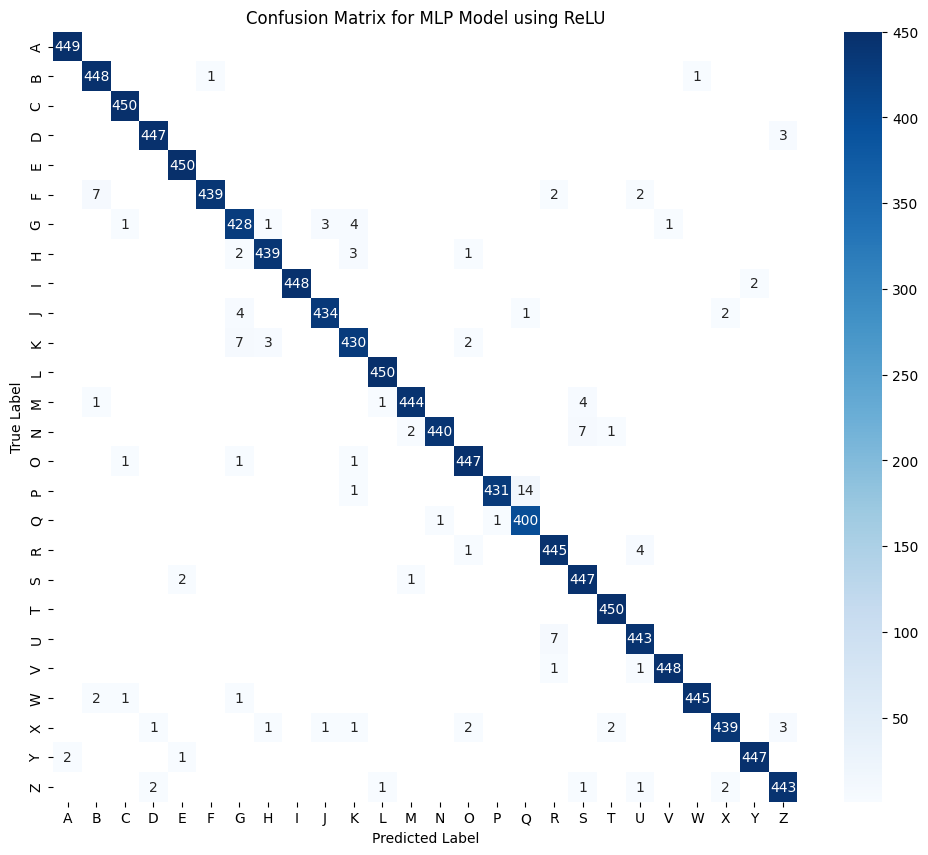

In [117]:
cm = confusion_matrix(y_true_all, y_pred_all)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan 

labels = [chr(i) for i in range(65, 91)]
plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP Model using ReLU")
plt.show()

Model for the real-time recognition

In [118]:
# y = data['Letter']
# X = data.drop(columns=['Letter'])
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = X_train.apply(pd.to_numeric, errors='coerce')
# X_train = X_train.dropna()
# X_train = X_train.to_numpy()
# X_val = X_val.apply(pd.to_numeric, errors='coerce')
# X_val = X_val.dropna()
# X_val = X_val.to_numpy()


# le = LabelEncoder()
# y_train = le.fit_transform(y_train)  
# y_val = le.transform(y_val)  

# keras_model = create_keras_model()
# keras_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
# keras_model.save(f"models/{language}/keras_ANN.keras")

### Training The Model Using ReLU Squared

#### Evauating model using k-fold

In [119]:
fold_accuracies = []
y_true_all = []
y_pred_all = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
split = skf.split(X, y_encoded)

for fold, (train_index, val_index) in enumerate(split):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    keras_model_relu_squared = create_keras_model(squared_relu)
    keras_model_relu_squared.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    val_loss, val_acc = keras_model_relu_squared.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_acc)
    print(f"Fold {fold + 1} Accuracy: {val_acc:.4f}")

    y_pred = np.argmax(keras_model.predict(X_val), axis=1)
    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)


print(f"\nMean Accuracy across folds: {np.mean(fold_accuracies):.4f}")



Training Fold 1...
Fold 1 Accuracy: 0.9858
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Fold 2...
Fold 2 Accuracy: 0.9854
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Fold 3...
Fold 3 Accuracy: 0.9858
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training Fold 4...
Fold 4 Accuracy: 0.9879
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Fold 5...
Fold 5 Accuracy: 0.9841
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Mean Accuracy across folds: 0.9858


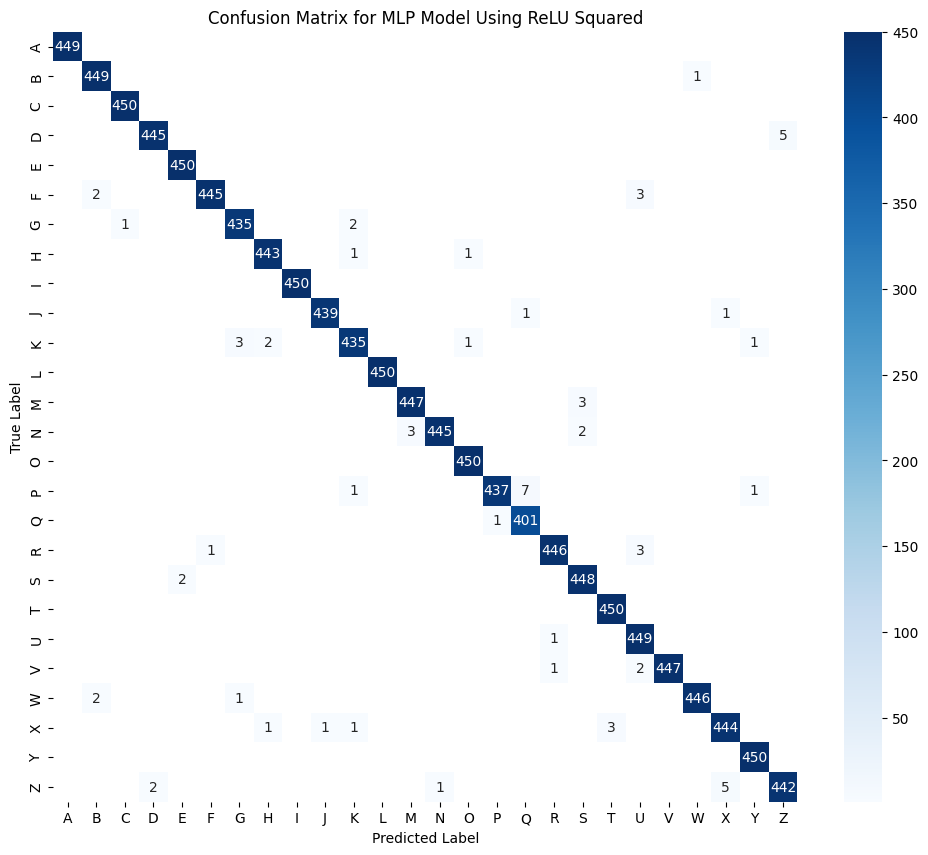

In [120]:
cm = confusion_matrix(y_true_all, y_pred_all)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP Model Using ReLU Squared")
plt.show()

### Training The Model Using ReLU Cubed

#### Evauating model using k-fold

In [121]:
fold_accuracies = []
y_true_all = []
y_pred_all = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
split = skf.split(X, y_encoded)

for fold, (train_index, val_index) in enumerate(split):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    keras_model_relu_cubed = create_keras_model(squared_relu)
    keras_model_relu_cubed.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    val_loss, val_acc = keras_model_relu_cubed.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_acc)
    print(f"Fold {fold + 1} Accuracy: {val_acc:.4f}")
    y_pred = np.argmax(keras_model.predict(X_val), axis=1)
    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)


print(f"\nMean Accuracy across folds: {np.mean(fold_accuracies):.4f}")



Training Fold 1...
Fold 1 Accuracy: 0.9867
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Fold 2...
Fold 2 Accuracy: 0.9867
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Fold 3...
Fold 3 Accuracy: 0.9772
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training Fold 4...
Fold 4 Accuracy: 0.9888
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training Fold 5...
Fold 5 Accuracy: 0.9828
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Mean Accuracy across folds: 0.9844


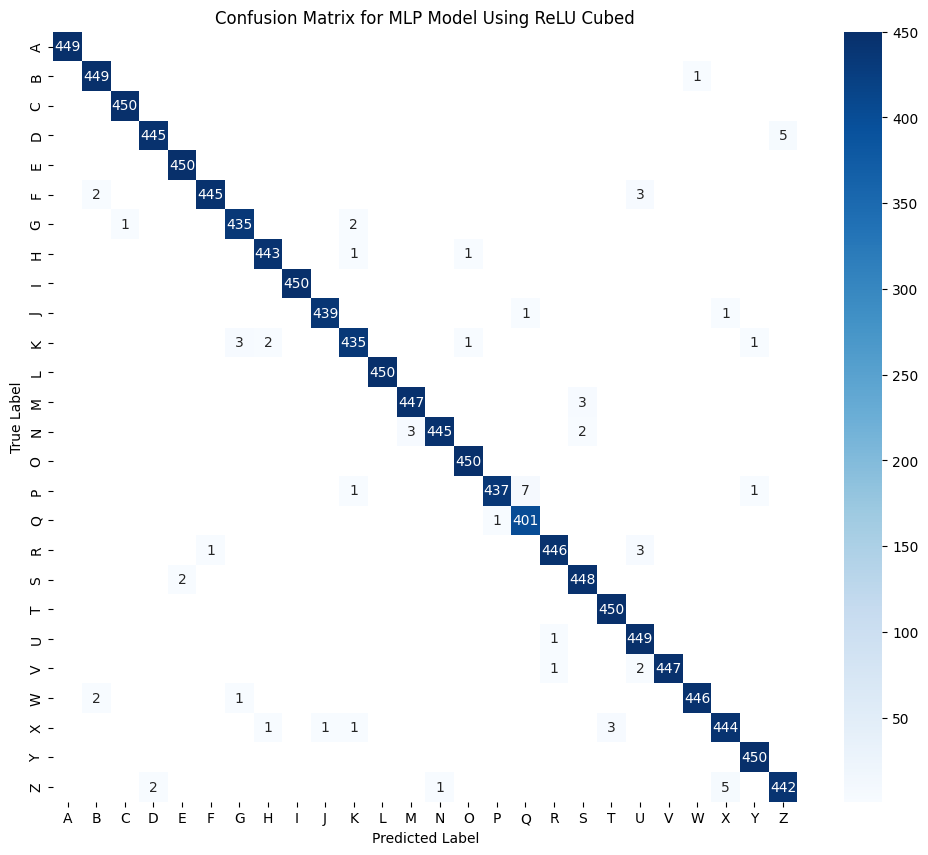

In [123]:
cm = confusion_matrix(y_true_all, y_pred_all)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP Model Using ReLU Cubed")
plt.show()

### Training The Model Using Root ReLU

#### Evauating model using k-fold

In [124]:
fold_accuracies = []
y_true_all = []
y_pred_all = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
split = skf.split(X, y_encoded)

for fold, (train_index, val_index) in enumerate(split):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    keras_model_root_relu = create_keras_model(squared_relu)
    keras_model_root_relu.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    val_loss, val_acc = keras_model_root_relu.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_acc)
    print(f"Fold {fold + 1} Accuracy: {val_acc:.4f}")
    y_pred = np.argmax(keras_model.predict(X_val), axis=1)
    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)


print(f"\nMean Accuracy across folds: {np.mean(fold_accuracies):.4f}")



Training Fold 1...
Fold 1 Accuracy: 0.9884
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Fold 2...
Fold 2 Accuracy: 0.9905
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training Fold 3...
Fold 3 Accuracy: 0.9866
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Fold 4...
Fold 4 Accuracy: 0.9879
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Fold 5...
Fold 5 Accuracy: 0.9849
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Mean Accuracy across folds: 0.9877


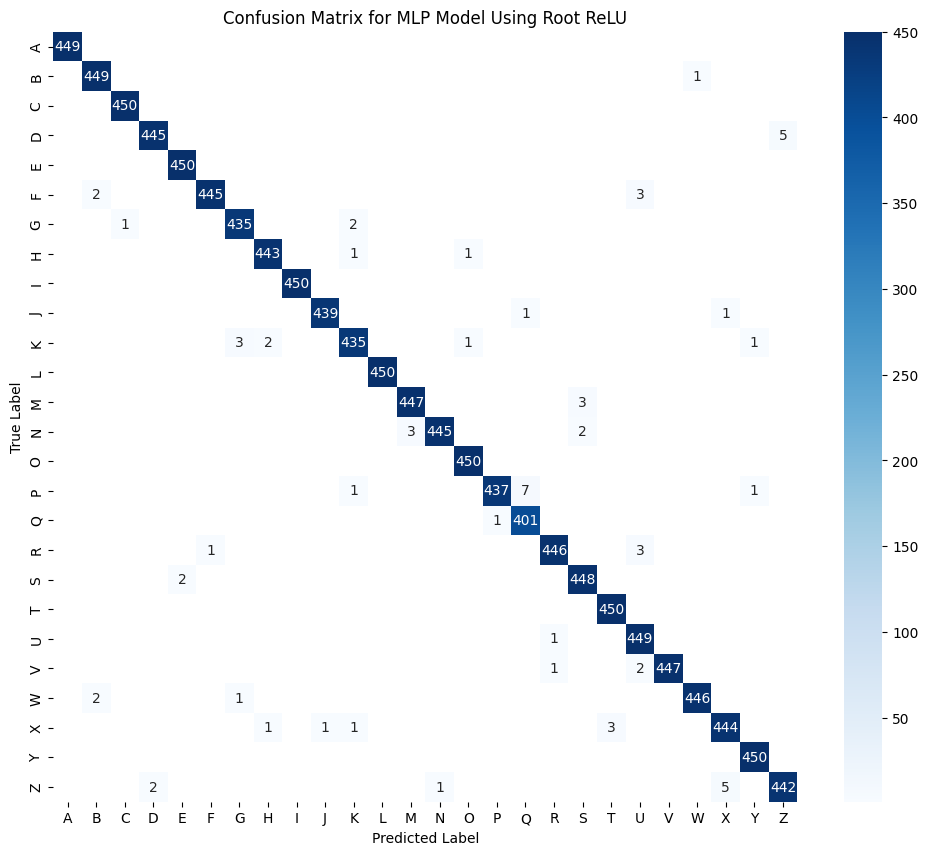

In [125]:
cm = confusion_matrix(y_true_all, y_pred_all)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP Model Using Root ReLU")
plt.show()

### Trying XGBoost Model

In [126]:
def create_xgb_model():
    model = xgb.XGBClassifier(
        objective="multi:softmax",
        num_class=26,
        eval_metric="mlogloss",
        max_depth=6,
        learning_rate=0.05,
        n_estimators=300,
        use_label_encoder=False
    )
    return model

#### Evaluating the model using k-fold

In [130]:
fold_accuracies = []
y_true_all = []
y_pred_all = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
split = skf.split(X, y_encoded)
fold = 0

for train_index, val_index in split:
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    xgb_model = create_xgb_model()
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    y_pred = xgb_model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    fold_accuracies.append(acc)
    print(f"Fold Accuracy: {acc:.4f}")

    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)
    fold += 1

print(f"\nMean Accuracy across folds: {np.mean(fold_accuracies):.4f}")


Training Fold 1...


d:\Fingerspelling-Recognition\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold Accuracy: 0.9871

Training Fold 2...


d:\Fingerspelling-Recognition\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold Accuracy: 0.9914

Training Fold 3...


d:\Fingerspelling-Recognition\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold Accuracy: 0.9845

Training Fold 4...


d:\Fingerspelling-Recognition\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold Accuracy: 0.9819

Training Fold 5...


d:\Fingerspelling-Recognition\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold Accuracy: 0.9854

Mean Accuracy across folds: 0.9860


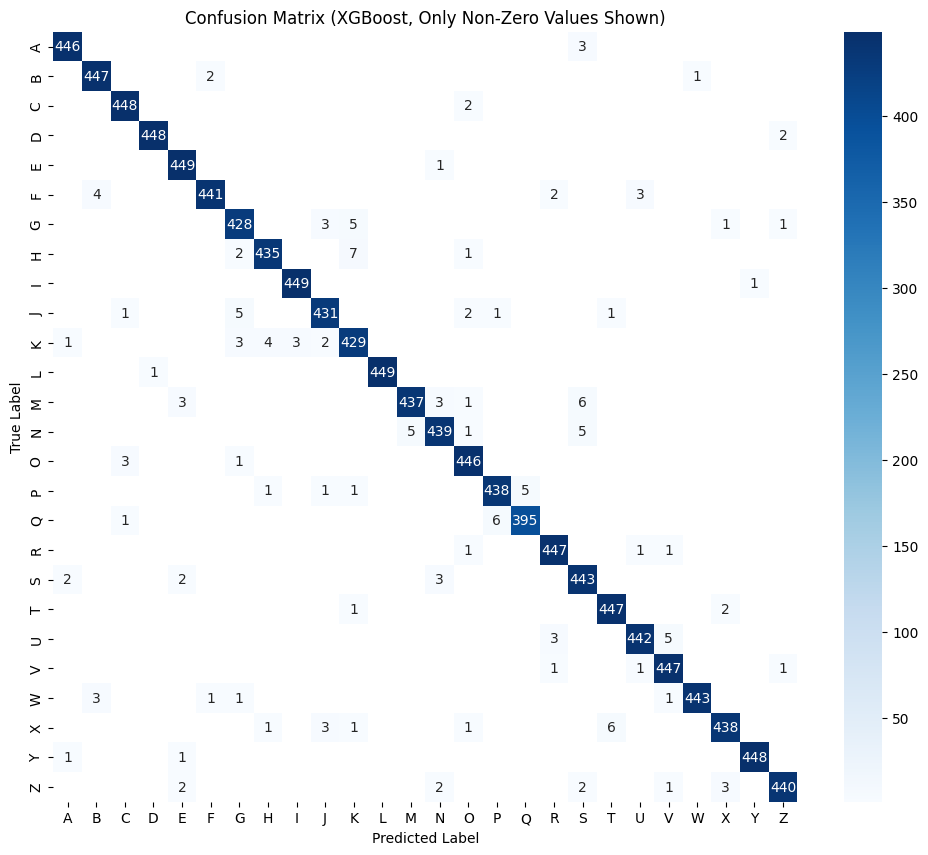

In [131]:
cm = confusion_matrix(y_true_all, y_pred_all)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (XGBoost, Only Non-Zero Values Shown)")
plt.show()

In [132]:
y = data['Letter']
X = data.drop(columns=['Letter'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.dropna()
X_train = X_train.to_numpy()
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_val = X_val.dropna()
X_val = X_val.to_numpy()

le = LabelEncoder()
y_train = le.fit_transform(y_train)  
y_val = le.transform(y_val)  

xgb_model = create_xgb_model()
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)
xgb_model.save_model(f"models/{language}/xgboost_model.json")

[0]	validation_0-mlogloss:2.75311


d:\Fingerspelling-Recognition\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-mlogloss:2.44699
[2]	validation_0-mlogloss:2.22186
[3]	validation_0-mlogloss:2.04074
[4]	validation_0-mlogloss:1.88927
[5]	validation_0-mlogloss:1.76008
[6]	validation_0-mlogloss:1.64753
[7]	validation_0-mlogloss:1.54812
[8]	validation_0-mlogloss:1.45863
[9]	validation_0-mlogloss:1.37772
[10]	validation_0-mlogloss:1.30395
[11]	validation_0-mlogloss:1.23587
[12]	validation_0-mlogloss:1.17356
[13]	validation_0-mlogloss:1.11581
[14]	validation_0-mlogloss:1.06156
[15]	validation_0-mlogloss:1.01126
[16]	validation_0-mlogloss:0.96449
[17]	validation_0-mlogloss:0.92053
[18]	validation_0-mlogloss:0.87950
[19]	validation_0-mlogloss:0.84037
[20]	validation_0-mlogloss:0.80374
[21]	validation_0-mlogloss:0.76918
[22]	validation_0-mlogloss:0.73703
[23]	validation_0-mlogloss:0.70617
[24]	validation_0-mlogloss:0.67739
[25]	validation_0-mlogloss:0.64991
[26]	validation_0-mlogloss:0.62378
[27]	validation_0-mlogloss:0.59895
[28]	validation_0-mlogloss:0.57537
[29]	validation_0-mlogloss:0.